# Diabetes Prediction using Support Vector Machine

## Importing the dependencies/libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Importing dataset and performing exploratory data analysis

In [7]:
# importing PIMA Diabetes Database to a pandas dataframe
diabetes = pd.read_csv('diabetes.csv')

In [8]:
# displaying the first 5 records from the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# finding the number of records and attributes in this dataset
diabetes.shape

(768, 9)

In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# finding the number of diabetic and non-diabetic patients in the dataset
# 1 means diabetic, 0 means non-diabetic
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
# separating data and labels
X = diabetes.drop(columns = 'Outcome', axis = 1)
Y = diabetes['Outcome']

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Performing data standardization

In [16]:
# creating an instance of StandardScaler dependency
scaler = StandardScaler()

In [17]:
standardized_data = scaler.fit_transform(X)

In [18]:
# printing the standardized data
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
# X represents the data
X = standardized_data

# Y represents the model
Y = diabetes['Outcome']

In [20]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [23]:
# checking the size of train test data
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training the model using a Support Vector Classifier 

In [24]:
# creating an instance of support vector classifier
classifier = svm.SVC(kernel='linear')

In [25]:
# training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model evaluation 

In [26]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
# displaying the accuracy score on training data
print("Accuracy score of training data: ", training_data_accuracy)

Accuracy score of training data:  0.7866449511400652


In [28]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
# displaying the accuracy score on test data
print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.7727272727272727


<Axes: >

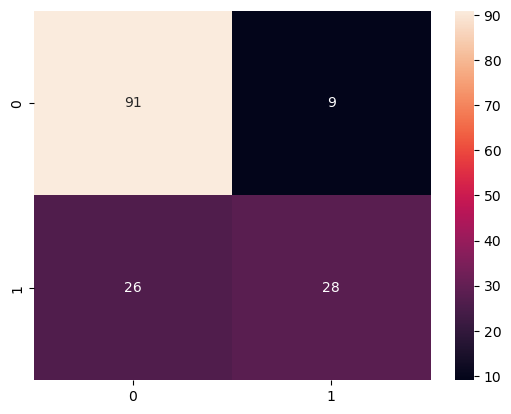

In [30]:
# displaying the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

In [31]:
# displaying the model's performance
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



## Building a predictive system 

In [32]:
input_data = (1,97,66,15,140,23.2,0.487,22)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)

#standardizing the input data
std_data = scaler.fit_transform(input_reshaped)


prediction = classifier.predict(std_data)

# printing the prediction
if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

The person is not diabetic


## Saving the trained model

In [33]:
import pickle

In [34]:
filename = 'diabetes_model.sav'

In [35]:
pickle.dump(classifier, open(filename, 'wb'))

### Made by Soumyajit Roy 